In [1]:
import numpy as np
import json
import os
import importlib
from IPython.display import display

In [2]:
import cmdbench

In [3]:
stress_benchmark = cmdbench.benchmark_command("node test.js", 1, debugging = True)

In [4]:
first_iteration = stress_benchmark.get_single_iteration()
print(first_iteration.gnu_time.disk)
print(first_iteration.psutil.disk)

{
  'file_system_inputs': 0,
  'file_system_outputs': 0,
}

{
  'io_counters': {
    'read_bytes': 0,
    'read_chars': 9577,
    'read_count': 20,
    'write_bytes': 0,
    'write_chars': 847,
    'write_count': 11,
  },
}



In [5]:
first_iteration

{
  'general': {
    'exit_code': 0,
    'stderr_data': '(node:10225) UnhandledPromiseRejectionWarning: TypeError:
                    global.gc is not a function\n\n    at main
                    ...(12 hidden lines)',
    'stdout_data': 'Running master process\n',
  },
  'gnu_time': {
    'cpu': {
      'system_time': 0.14,
      'total_time': 1.7000000000000002,
      'user_time': 1.56,
    },
    'disk': {
      'file_system_inputs': 0,
      'file_system_outputs': 0,
    },
    'memory': {
      'max_perprocess': 628965376,
    },
    'process': {
      'execution_time': 2.08,
    },
  },
  'gnu_time_results': {
    'Average resident set size (kbytes)': 0,
    'Average shared text size (kbytes)': 0,
    'Average stack size (kbytes)': 0,
    'Average total size (kbytes)': 0,
    'Average unshared data size (kbytes)': 0,
    'Command being timed': '"node test.js"',
    'Elapsed (wall clock) time (h:mm:ss or m:ss)': 2.08,
    'Exit status': 0,
    'File system inputs': 0,
    'File 

In [6]:
stress_benchmark = cmdbench.benchmark_command("python tests/read_binary_test.py", 1, debugging = True)

In [7]:
first_iteration = stress_benchmark.get_single_iteration()
print(first_iteration.gnu_time.disk)
print(first_iteration.psutil.disk)

{
  'file_system_inputs': 0,
  'file_system_outputs': 0,
}

{
  'io_counters': {
    'read_bytes': 0,
    'read_chars': 205804,
    'read_count': 52,
    'write_bytes': 0,
    'write_chars': 89,
    'write_count': 1,
  },
}



In [8]:
benchmark = cmdbench.benchmark_command("node --expose-gc test.js", 1, debugging=True)

In [9]:
benchmark.get_single_iteration()

{
  'general': {
    'exit_code': 0,
    'stderr_data': '',
    'stdout_data': 'Running master process\n\nRunning child process
                    #4\n\nRunning child process #1\n\nRunning child process
                    ...(4 hidden lines)',
  },
  'gnu_time': {
    'cpu': {
      'system_time': 1.77,
      'total_time': 26.009999999999998,
      'user_time': 24.24,
    },
    'disk': {
      'file_system_inputs': 0,
      'file_system_outputs': 1310720,
    },
    'memory': {
      'max_perprocess': 629211136,
    },
    'process': {
      'execution_time': 6.4,
    },
  },
  'gnu_time_results': {
    'Average resident set size (kbytes)': 0,
    'Average shared text size (kbytes)': 0,
    'Average stack size (kbytes)': 0,
    'Average total size (kbytes)': 0,
    'Average unshared data size (kbytes)': 0,
    'Command being timed': '"node --expose-gc test.js"',
    'Elapsed (wall clock) time (h:mm:ss or m:ss)': 6.4,
    'Exit status': 0,
    'File system inputs': 0,
    'File syste

In [10]:
benchmark.get_values_per_attribute()

{
  'general': {
    'exit_code': [0],
    'stderr_data': [''],
    'stdout_data': [
      'Running master process\n\nRunning child process
                      #4\n\nRunning child process #1\n\nRunning child process
                      ...(4 hidden lines)',
    ],
  },
  'gnu_time': {
    'cpu': {
      'system_time': [1.77],
      'total_time': [26.009999999999998],
      'user_time': [24.24],
    },
    'disk': {
      'file_system_inputs': [0],
      'file_system_outputs': [1310720],
    },
    'memory': {
      'max_perprocess': [629211136],
    },
    'process': {
      'execution_time': [6.4],
    },
  },
  'gnu_time_results': {
    'Average resident set size (kbytes)': [0],
    'Average shared text size (kbytes)': [0],
    'Average stack size (kbytes)': [0],
    'Average total size (kbytes)': [0],
    'Average unshared data size (kbytes)': [0],
    'Command being timed': ['"node --expose-gc test.js"'],
    'Elapsed (wall clock) time (h:mm:ss or m:ss)': [6.4],
    'Exit statu

In [11]:
benchmark_statistics = benchmark.get_statistics()

In [12]:
benchmark_statistics.gnu_time

{
  'cpu': {
    'system_time': (mean: 1.77, stdev: 0.0, min: 1.77, max: 1.77)
    'total_time': (mean: 26.009999999999998, stdev: 0.0, min: 26.009999999999998, max: 26.009999999999998)
    'user_time': (mean: 24.24, stdev: 0.0, min: 24.24, max: 24.24)
  },
  'disk': {
    'file_system_inputs': (mean: 0.0, stdev: 0.0, min: 0, max: 0)
    'file_system_outputs': (mean: 1310720.0, stdev: 0.0, min: 1310720, max: 1310720)
  },
  'memory': {
    'max_perprocess': (mean: 629211136.0, stdev: 0.0, min: 629211136, max: 629211136)
  },
  'process': {
    'execution_time': (mean: 6.4, stdev: 0.0, min: 6.4, max: 6.4)
  },
}

In [13]:
benchmark_statistics.psutil

{
  'cpu': {
    'system_time': (mean: 0.17, stdev: 0.0, min: 0.17, max: 0.17)
    'total_time': (mean: 26.0, stdev: 0.0, min: 26.0, max: 26.0)
    'user_time': (mean: 1.56, stdev: 0.0, min: 1.56, max: 1.56)
  },
  'disk': {
    'io_counters': {
      'read_bytes': (mean: 0.0, stdev: 0.0, min: 0, max: 0)
      'read_chars': (mean: 1407032.0, stdev: 0.0, min: 1407032, max: 1407032)
      'read_count': (mean: 295.0, stdev: 0.0, min: 295, max: 295)
      'write_bytes': (mean: 1310720.0, stdev: 0.0, min: 1310720, max: 1310720)
      'write_chars': (mean: 1311999.0, stdev: 0.0, min: 1311999, max: 1311999)
      'write_count': (mean: 147.0, stdev: 0.0, min: 147, max: 147)
    },
  },
  'memory': {
    'max': (mean: 4908154880.0, stdev: 0.0, min: 4908154880, max: 4908154880)
    'max_perprocess': (mean: 629211136.0, stdev: 0.0, min: 629211136, max: 629211136)
  },
  'process': {
    'execution_time': (mean: 6.396, stdev: 0.0, min: 6.396, max: 6.396)
  },
}

In [14]:
fig = benchmark.get_resources_plot(15, 6)

In [15]:
# Delete figure file if it already exists and save the new one
figure_image_save_path = "resources/benchmark.png"
if os.path.exists(figure_image_save_path):
    os.remove(figure_image_save_path)
fig.savefig(figure_image_save_path)

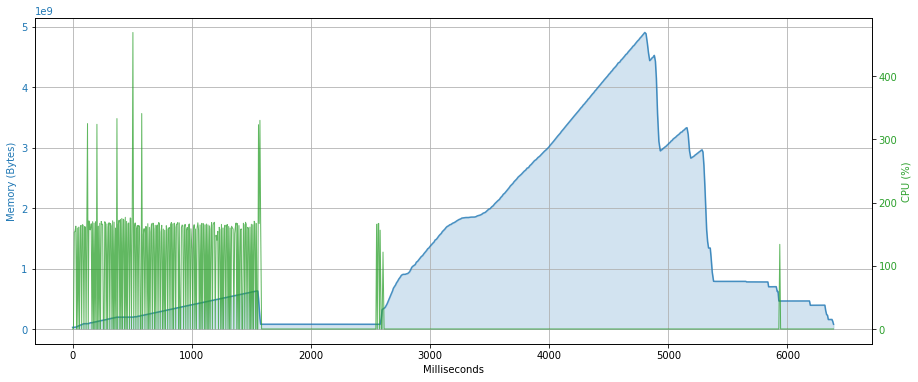

In [16]:
%matplotlib inline
display(fig)